In [27]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from numpy.random import choice
from numpy import log10

In [1]:
# Columns of the datasets
# Geo_cat = ['CHI ID COM']#'BRA ID MIR'
# HS_cat = ['HS ID 6']
# ind_cat = ['CIIU ID 4']

Geo_cat = ['BRA ID MIR']#'BRA ID MIR'
HS_cat = ['HS ID 4']
ind_cat = ['CNAE ID C', 'CBO ID F']


var = 'Total Yearly Wages' # 'output_USD'
var_str = '_w'
var_lab_str = 'Wages in '# 'Output of ' #'Wages in '

In [2]:
#Choose a configuration for further aggregation.


ctry_str = Geo_cat[0][:3]
geo_str = Geo_cat[0][-3:]

confs = [('4', '2', '2'),
         ('4', '4', '2')]

confs = [('0', 'G', '4', '4'),
         ('GG', 'D', '4', '4'),
         ('SGP', 'S', '4', '4'),
         ('SGP', 'S', '4', '4')]

for conf in confs:
#     (CIIU_lev, HS_Exp, HS_Imp) = conf
    (CBO_lev, CNAE_lev, HS_Exp, HS_Imp) = conf

    col_name = ctry_str+'_'+geo_str+'_'+'_'.join([c for c in conf])+var_str
    print col_name

BRA_MIR_0_G_4_4_w
BRA_MIR_GG_D_4_4_w
BRA_MIR_SGP_S_4_4_w
BRA_MIR_SGP_S_4_4_w


In [5]:
path = 'data/disagg_struct_refs/formatted/'
GEO_chi = pd.read_csv(path+'GEO_chi.csv')[['reg_id', 'reg_name', 'prov_id','prov_name', 'area_id', 'area_name','LLMACode', 'comuna_id', 'comuna_nam']]
GEO_chi = GEO_chi.rename({'reg_id':'CHI ID REG', 'prov_id':'CHI ID PRO', 'comuna_id':'CHI ID COM',
                         'reg_name':'CHI label REG', 'prov_name':'CHI label PRO', 'comuna_nam':'CHI label COM',
                         'area_id': 'CHI ID ARE', 'area_name': 'CHI label ARE','LLMACode': 'CHI ID LLMA'},axis = 1)

GEO_bra = pd.read_csv('data/disagg_struct_refs/formatted/GEO_bra.csv')

GEO_bra['BRA label EST'] = GEO_bra['BRA ID EST']
GEO_bra['BRA label MER'] = GEO_bra['BRA ID MER']
GEO_bra['BRA label MIR'] = GEO_bra['BRA ID MIR']

In [277]:
conf = confs[0]


(CBO_lev, CNAE_lev, HS_Exp, HS_Imp) = conf

df_list = []
for geo_str in ['MIR', 'MER', 'EST']:
    col_name = ctry_str+'_'+geo_str+'_'+'_'.join([c for c in conf])+var_str
        
    df = log10(pd.read_csv('./data/node_refs/'+col_name+'_main_table.csv', index_col=0))
    df_list += [df]
    


/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10


In [278]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
import seaborn as sns
sns.set(style="ticks")
    
col_name = ctry_str+'_'+geo_str+'_'+'_'.join([c for c in conf])+var_str
nodes = pd.read_csv('./data/node_refs/'+col_name+'_nodes.csv')

acts = np.sort(choice(nodes['node_name'], 15, replace = False)) #species

df_list_ = []
for df in df_list:
    df_ = df[acts]
    df_['Geo level'] = df_.index.name
    df_list_ +=[df_]

x = pd.concat(df_list_)
    
    
x.columns = [c[:30] for c in x.columns]

sns.pairplot(x.fillna(0), hue='Geo level')


/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/miglesia/anaconda2/lib/python2.7/site-packages/numpy/core/function_base.py:99: RuntimeWarning: invalid value encountered in multiply
  y = _nx.arange(0, num, dtype=dtype) * step + start
/home/miglesia/anaconda2/lib/python2.7/site-packages/numpy/core/function_base.py:99: RuntimeWarning: invalid value encountered in add
  y = _nx.arange(0, num, dtype=dtype) * step + start
/home/miglesia/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:195: RuntimeWarning: invalid value encountered in less
  if (np.diff(bins) < 0).any():


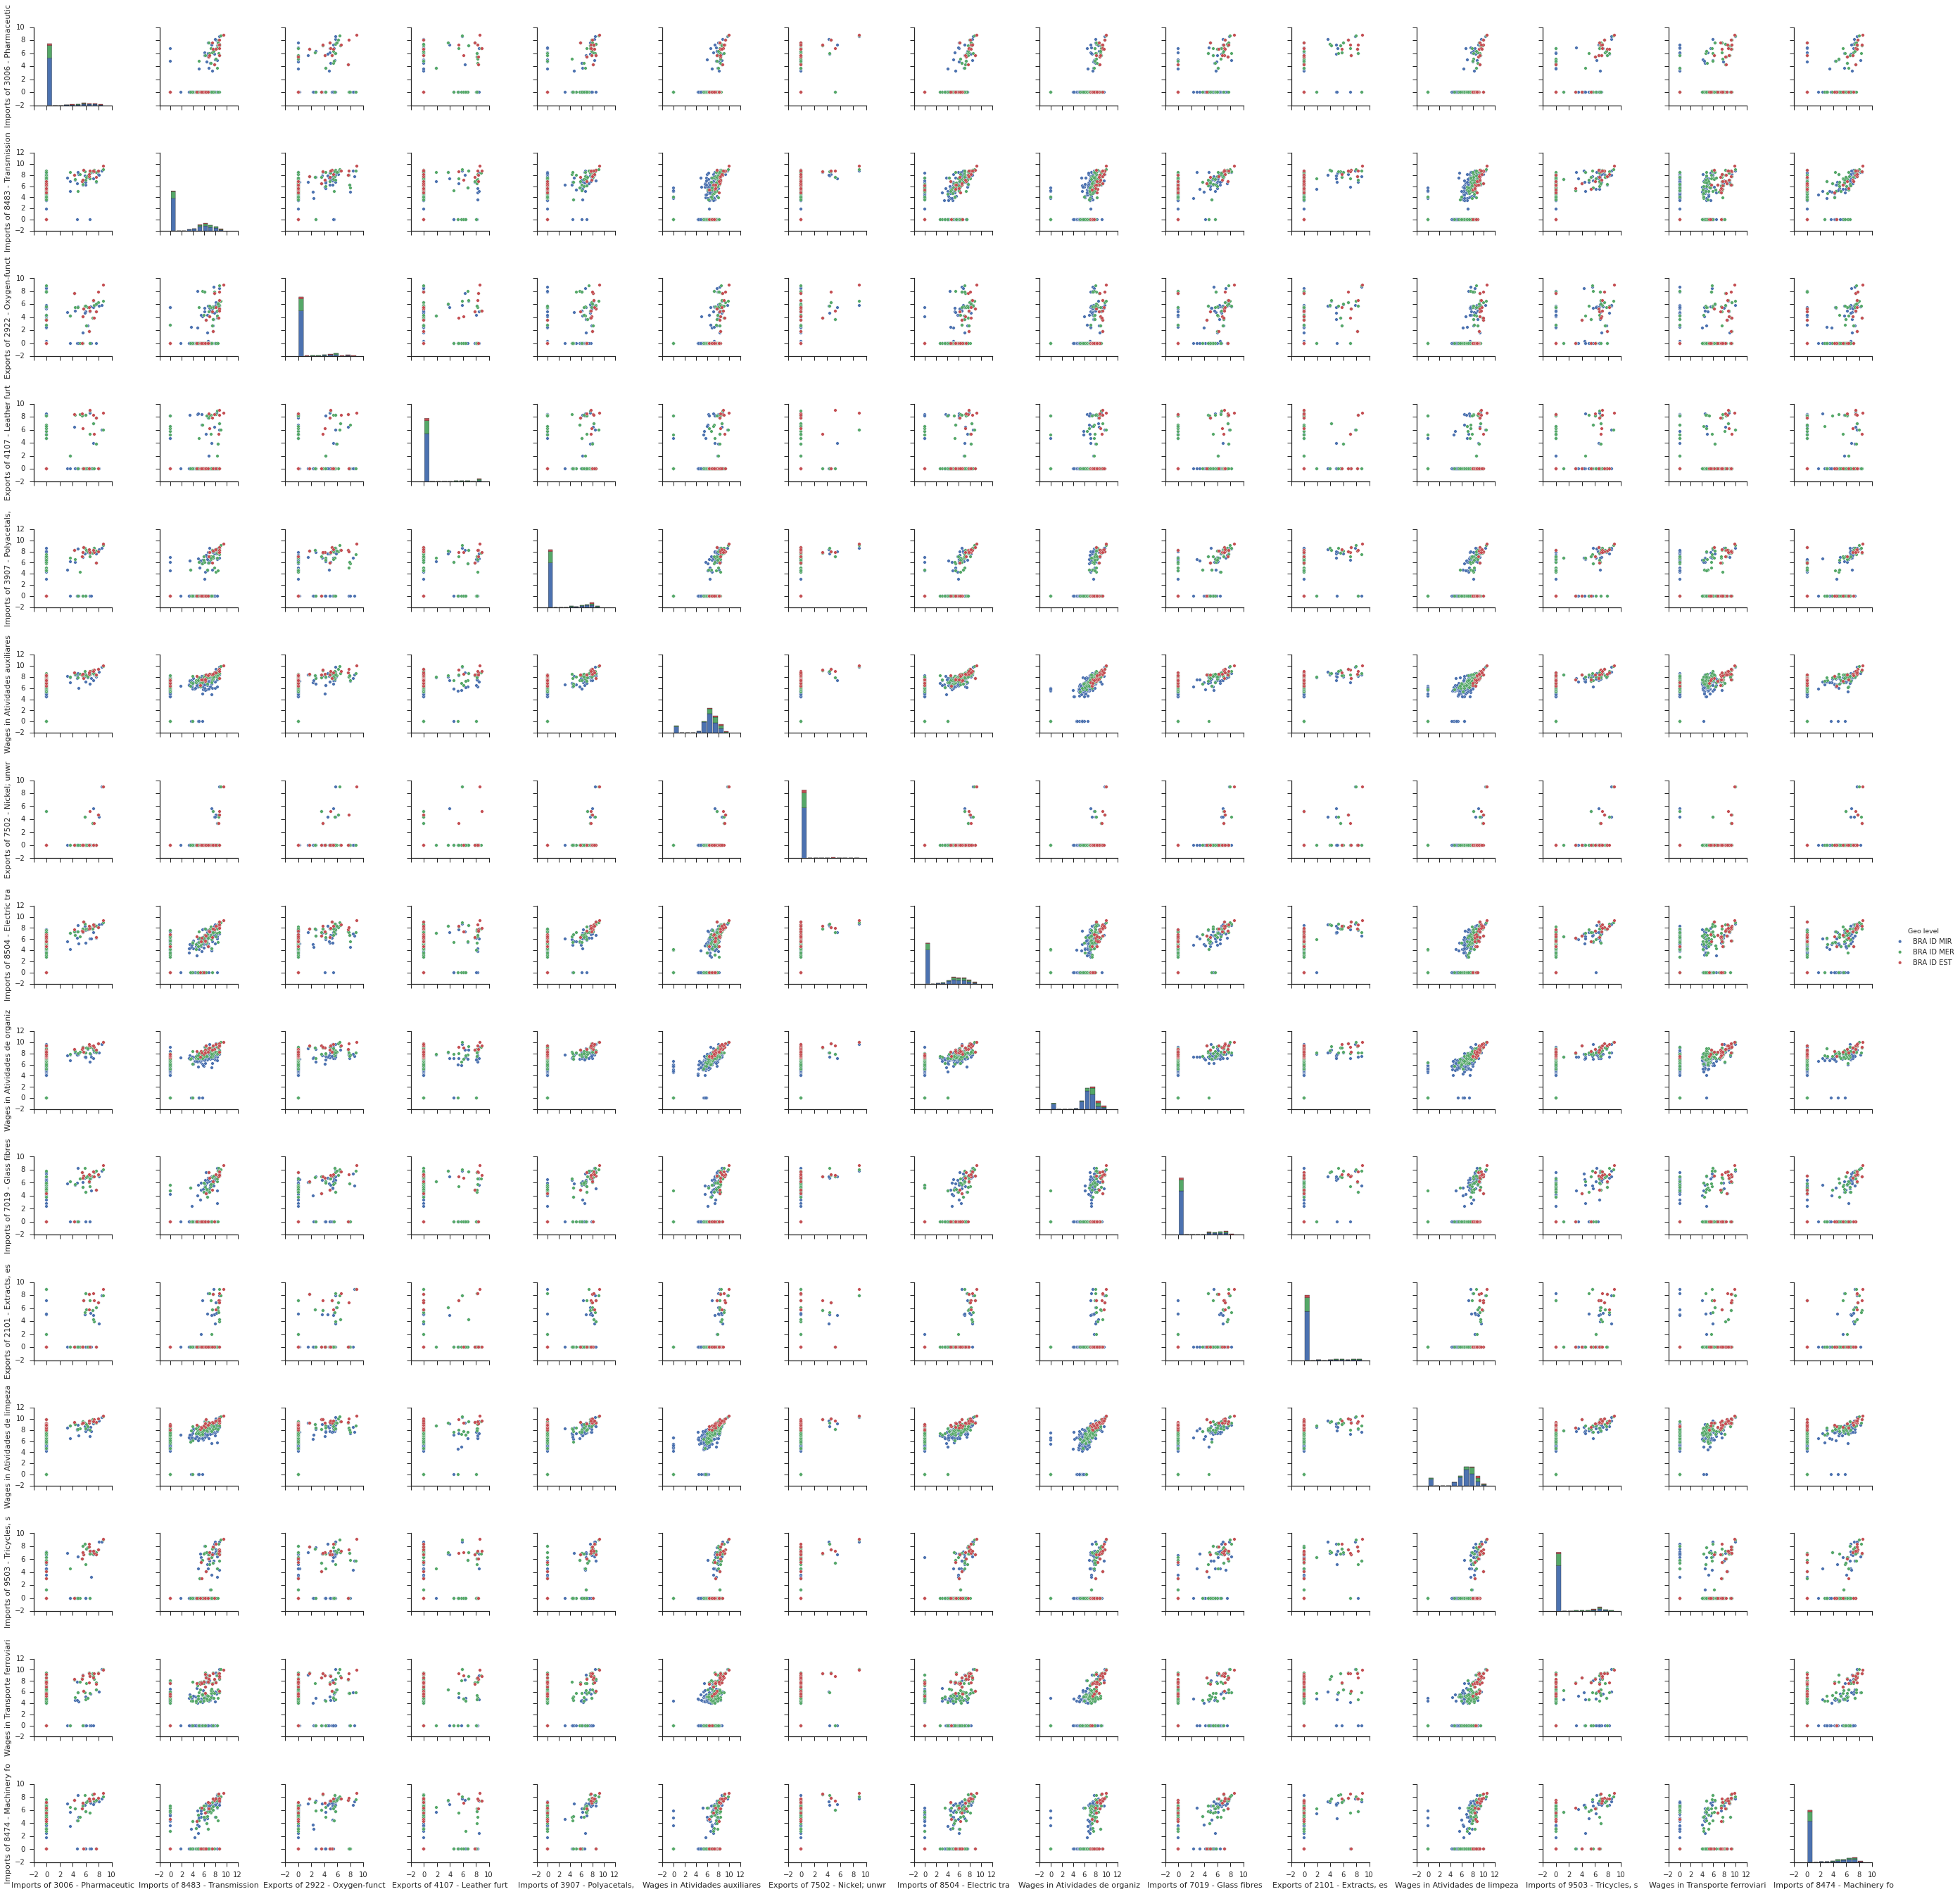

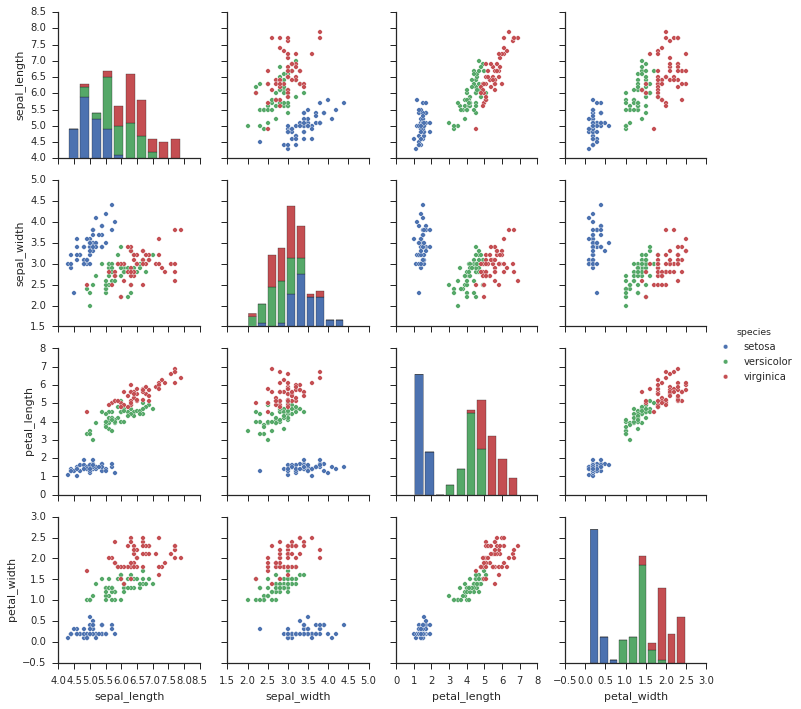

In [126]:
import seaborn as sns
import math

from bokeh.io import show, output_file, save
from bokeh.plotting import figure
from bokeh.models import GraphRenderer, StaticLayoutProvider, Circle, MultiLine, NodesOnly, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.models.graphs import from_networkx
from bokeh.models.tools import HoverTool

max_d = 10
# geo_str = 'COM'
geo_str = 'MIR'
places_id = 'BRA ID MIR' #'CHI ID COM'
places_label = 'BRA label MIR' #'CHI label COM'
GEO_ref = GEO_bra #GEO_chi

l = len(geo_levels)

k = .1

for j in range(len(confs)):

    conf = confs[j]


#     (CIIU_lev, HS_Exp, HS_Imp) = conf
    (CBO_lev, CNAE_lev, HS_Exp, HS_Imp) = conf
    print conf

    col_name = ctry_str+'_'+geo_str+'_'+'_'.join([c for c in conf])+var_str

    nodes = pd.read_csv('data/node_refs/'+col_name+'_nodes_meta.csv', index_col = 0)
    edges = pd.read_csv('data/node_refs/'+col_name+'_edges.csv', index_col = 0)

#         print 'max degree: '+str(max_d)

        ### Max degree = max_d
    df1 = edges.groupby('label_x').apply(lambda x: x.nlargest(max_d, 'weight_'+geo_str)).reset_index(drop = True)
    df2 = edges.groupby('label_y').apply(lambda x: x.nlargest(max_d, 'weight_'+geo_str)).reset_index(drop = True)
    edges = df1.merge(df2, on = ['label_x', 'label_y', 'weight_'+geo_str]).reset_index(drop = True)

#     Add info of districts with most volume (CHI)
    ###
    concat_data = pd.read_csv('data/node_refs/'+col_name+'_concat_data.csv', index_col = 0).reset_index()
    df = concat_data.sort_values(by = ['node_name', 'value_USD'])

    df['rk'] = df.groupby('node_name')['value_USD'].rank(method = 'first', ascending = False)
    df['pct'] = df['value_USD'].div(df['node_value_USD']).multiply(100).dropna().round(1)

    df = df.loc[df.rk <= 3].merge(GEO_ref[[places_id, places_label]].drop_duplicates())
    df['info_'] = df[places_label] + ' ('+df.pct.astype(str)+'%)'
    df = df.sort_values(by = 'node_name')
    df = pd.DataFrame(df.set_index(['node_name', 'rk'])[['info_']].unstack())
    # df
    df.columns = df.columns.droplevel(0)

    df['info'] = df[1.0] +', '+ df[2.0]+', '+df[3.0]
    df = df.reset_index()[['node_name', 'info']]

    nodes = nodes.merge(df[['node_name', 'info']])
    
#     ###

    G = nx.from_pandas_dataframe(edges, 'label_x', 'label_y', 'weight_'+geo_str)
    
    
    
    ### Subgraph - neighborhood
    # Random choice of some nodes...
    nodes_choice = choice(G.nodes(), 5)
    
    for node in nodes_choice:

        ix = nodes.loc[nodes['node_name'] == node].index.values[0]
        
        G_s = G.subgraph(second_neighbors(G, [node], second_order=True))  
        nodes_s = nodes.set_index('node_name').loc[G_s.nodes()].reset_index()
        edges_s = edges.loc[(edges.label_x.isin(G_s.nodes())) & (edges.label_y.isin(G_s.nodes()))]


        # nx.write_gexf(G,'networks/'+col_name+'.gexf')

    #         print 'nodes: '+str(len(G.nodes()))
    #         print 'edges: '+str(len(G.edges()))

        # Subset of nodes
#         nodes_s = nodes.set_index('node_name').loc[G_s.nodes()].reset_index()

        #Perform Graph Drawing
    #     pos = nx.spring_layout(G, k=k)
    #     nx.draw(G, pos, ax = ax, node_size = 5*nodes.node_size.values, alpha=.6, node_color= list(nodes.color.values), edgelist = [])

        #     Bokeh drawing
        ####

        N = len(nodes_s)
        node_indices = list(range(N))
        nodes_s['node_name_'] = [wrap_by_word(s, 5) for s in nodes_s['node_name'].values]

        plot = figure(title=col_name, x_range=(-1.1,1.1), y_range=(-1.1,1.1))

        #####

        graph = from_networkx(G_s, nx.spring_layout, center=(0,0), k = k)

        graph.node_renderer.data_source.add(list(nodes_s['color'].values), 'color')
        graph.node_renderer.data_source.add(list(nodes_s['node_name_'].values), 'node_name_')
        graph.node_renderer.data_source.add(list(nodes_s['node_value_USD'].values), 'node_value_USD')
        graph.node_renderer.data_source.add(list(nodes_s['info'].values), 'info')
        graph.node_renderer.data_source.add(list(.5*nodes_s['node_size'].values), 'node_size')

        graph.node_renderer.glyph = Circle(size='node_size', fill_color='color')
        graph.node_renderer.selection_glyph = Circle(size=15, fill_color='#808000')
        graph.node_renderer.hover_glyph = Circle(size=15, fill_color='#808000')

        graph.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.5, line_width=1)
        graph.edge_renderer.selection_glyph = MultiLine(line_color='#808000', line_width=5)
        graph.edge_renderer.hover_glyph = MultiLine(line_color='#808000', line_width=5)
        graph.selection_policy = NodesAndLinkedEdges()
        graph.selection_policy = EdgesAndLinkedNodes()

        plot.renderers.append(graph)

        hover = HoverTool(tooltips=dict(main_place="@info", value="@node_value_USD", activity="@node_name_"))
        # hover = HoverTool(tooltips = [('Info', '@node_name'),('(x,y)', '($x, $y)')])

        plot.add_tools(hover)

        output_file('./Figures/6_neighbhoods/'+col_name+'_'+str(ix).zfill(3)+'.html')
        save(plot)

NameError: name 'geo_levels' is not defined

### Trying to add some info to the nodes...

In [235]:
def wrap_by_word(s, n):
    '''returns a string where \\n is inserted between every n words'''
    a = s.split()
    ret = ''
    for i in range(0, len(a), n):
        ret += ' '.join(a[i:i+n]) + ' \n '

    return ret


There is a dog 
 and fox fighting in 
 the park and there 
 is an apple falling 
 down. 
 


In [51]:
# node
second_neighbors(G, node, second_order=True)

def second_neighbors(graph, nodes, second_order = True):
    """                                                                                                                          
    a generator that yeilds second neighbors of node in graph                                                                    
    neighbors are not not unique!                                                                                                
    """
    neighbor_list = [nodes]

    for i in range(len(nodes)):
        neighbor_list += [graph.neighbors(nodes[i])]
        
        if second_order == True:
            for n in graph.neighbors(nodes[i]):
                    neighbor_list += [graph.neighbors(n)]


    return list(set([item for sublist in neighbor_list for item in sublist]))

NetworkXError: The node O is not in the graph.

In [20]:


k = .05
max_d = 10

for conf in confs:
    (CIIU_lev, HS_Exp, HS_Imp) = conf
    col_name = ctry_str+'_'+geo_str+'_'+'_'.join([c for c in conf])+var_str
    print col_name
    
    for i in range(10):


        nodes = pd.read_csv('data/node_refs/'+col_name+'_nodes_meta.csv', index_col = 0)
        print len(nodes)
        edges = pd.read_csv('data/node_refs/'+col_name+'_edges.csv', index_col = 0)

        ### Max degree = max_d
        df1 = edges.groupby('label_x').apply(lambda x: x.nlargest(max_d, 'weight_COM')).reset_index(drop = True)
        df2 = edges.groupby('label_y').apply(lambda x: x.nlargest(max_d, 'weight_COM')).reset_index(drop = True)
        edges = df1.merge(df2, on = ['label_x', 'label_y', 'weight_COM']).reset_index(drop = True)

        G = nx.from_pandas_dataframe(edges, 'label_x', 'label_y', 'weight_'+geo_str)


        ### Subgraph - neighborhood
    #         nodes_sel = select_nodes_by_kw(G, ['Wine','grape', 'Grape','bebidas fermentadas'])
    #     nodes_sel = [ 'Output ofPesca maritima ']
    #     nodes_sel = select_nodes_by_kw(G, ['Silvicultura'])
        nodes_sel = choice(G.nodes(), 1)

        G = G.subgraph(second_neighbors(G, nodes_sel, second_order=True))  
        nodes = nodes.set_index('node_name').loc[G.nodes()].reset_index()
        edges = edges.loc[(edges.label_x.isin(G.nodes())) & (edges.label_y.isin(G.nodes()))]

        # nx.write_gexf(G,'networks/'+col_name+'.gexf')

    #     Networkx drawing
        #Perform Graph Drawing
        plt.figure(figsize=(8, 8))
        pos = nx.spring_layout(G, k=0.15)

        nx.draw(G, pos, node_size = 10 * nodes.node_size.values, alpha=.6, node_color= list(nodes.color.values), edgelist = [])
        nx.draw_networkx_edges(G, pos, edge_color='.7', alpha=.3)
        #     plt.savefig('../DataViva/Figures/'+'_'+kw+'_'+name)
        plt.show()

        ####

    #     Bokeh drawing
        ####

        N = len(nodes)
        node_indices = list(range(N))
        # sizes = np.linspace(10, 20, N)
        # node_sizes = np.sqrt(nodes['node_size'].values)

        plot = figure(title="Networkx Integration Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1))

        #####

        graph = from_networkx(G, nx.spring_layout, center=(0,0), k = k)

        graph.node_renderer.data_source.add(list(nodes['color'].values), 'color')
        graph.node_renderer.data_source.add(list(nodes['node_name'].values), 'node_name')
        graph.node_renderer.data_source.add(list(2*nodes['node_size'].values), 'node_size')

        graph.node_renderer.glyph = Circle(size='node_size', fill_color='color')
        graph.node_renderer.selection_glyph = Circle(size=15, fill_color='#808000')
        graph.node_renderer.hover_glyph = Circle(size=15, fill_color='#808000')

        graph.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.2, line_width=1)
        graph.edge_renderer.selection_glyph = MultiLine(line_color='#808000', line_width=5)
        graph.edge_renderer.hover_glyph = MultiLine(line_color='#808000', line_width=5)
        graph.selection_policy = NodesAndLinkedEdges()

        plot.renderers.append(graph)

        hover = HoverTool(plot=plot, tooltips=dict(act="@node_name", value="@node_size"))
        # hover = HoverTool(tooltips = [('Info', '@node_name'),('(x,y)', '($x, $y)')])

        plot.add_tools(hover)

#         output_file("networkx_graph.html")
        # output_notebook()
        show(plot)

        nodes = nodes.sort_values(by = 'node_size', ascending = False)
        sns.barplot(x='node_size',y='node_name',palette=nodes['color'], data=nodes, edgecolor = 'None')


CHI_COM_4_2_2_o
223


NameError: name 'plt' is not defined

In [15]:
conf

[('4', '2', '2'), ('4', '4', '2')]